<a href="https://colab.research.google.com/github/shree0156/ocr-text-extracter/blob/main/OCRTextExtracter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OCR Text Extracter:
Optical Character Recognition (OCR) using Tesseract
OCR = the process of extracting text from images.

Tesseract OCR Engine:
Developed by HP, maintained by Google
Uses deep learning + pattern recognition to understand characters

Works best on:
Clean, high-contrast text
Printed (not cursive) fonts
Structured layouts
#Installing Dependencies
pytesseract: Python wrapper for Google’s Tesseract-OCR Engine

opencv-python: For image processing

apt-get install tesseract-ocr: Installs the actual Tesseract engine on Colab


#Libraries
cv2 - OpenCV - loads and manipulates images
pytesseract - access to OCR function
matplotlib.pyplot - display of image

#Image Processing
The f before the opening quotation mark
in print(f"Error: Could not load image from {image_path}") is crucial. It designates the string as an f-string, also known as a "formatted string literal".
F-strings provide a concise and readable way to embed expressions inside string literals. They make it easier to create dynamic strings where you want to include the values of variables or the results of calculations.

#Thresholding
Override: Otsu's method essentially overrides the initial threshold value of 150 and calculates a more suitable threshold for the specific image.
 While the 150 value is initially provided, it's primarily a starting point for the thresholding process. Otsu's method will likely adjust this value to better segment the image based on its content.

white - 255, black - 0

OCR works better on high-contrast images.

Grayscale removes color noise.

Thresholding makes the text pop out clearly (turns the image to black and white based on intensity).

#File:
Writes the OCR result into a .txt file.

Helps when you're processing many images or want to keep records.



#Running Pipeline
this is the last step

#Code Below

In [ ]:
!pip install pytesseract opencv-python
!apt-get install -y tesseract-ocr #only in google colab

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


Enter the path to your image: /sample1.jpg


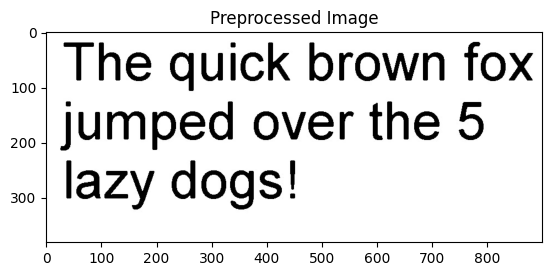

OCR Result:
The quick brown fox
jumped over the 5
lazy dogs!

Text saved to extracted_text.txt


In [ ]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

def preprocessing_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None, None

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply median blur BEFORE thresholding
    blur = cv2.medianBlur(gray, 3)

    # Apply thresholding
    thr = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)[1]

    # Morphological operations to remove small noise
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    cleaned = cv2.morphologyEx(thr, cv2.MORPH_OPEN, kernel)

    return blur, cleaned  # Return blurred grayscale and thresholded image

# Get image path from user
image_path = input("Enter the path to your image: ").replace("\\", "/")

gray_image, thresholded_image = preprocessing_image(image_path)

if gray_image is not None:
    plt.imshow(gray_image, cmap='gray')
    plt.title('Preprocessed Image')
    plt.show()

def extracted_text(thresholded_image):
    return pytesseract.image_to_string(thresholded_image, lang='eng')

def save_text(text, filename="extracted_text.txt"):
    with open(filename, "w") as f:
        f.write(text)
        print(f"Text saved to {filename}")

def run_ocr_pipeline(image_path):
    original, processed = preprocessing_image(image_path)
    text_result = extracted_text(processed)
    print("OCR Result:")
    print(text_result)
    save_text(text_result)

run_ocr_pipeline(image_path)
